# Linear advection
The upstream scheme for the case in which $u \gt 0$ is the forward in time, backward in space:
$$\phi_j^{n+1} = (1-c)\phi_j^n + c\phi_{j-1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$

If $\Delta t \gt \Delta x/u$ or $c \gt 1$ the model is not stable (CFL violation)

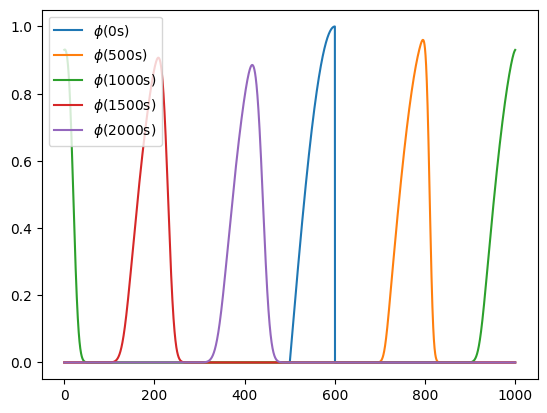

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
# Initialization
u = 0.42
dx = 0.25
dt = 0.15

# Define distribution function
def funcAdvec(x):
    """Distribution in space"""
    y = [0]*len(x)
    for i in range(0, len(x)):
        if x[i] < 500 or x[i] > 600:
            y[i] = 0
        else:
            y[i] = -np.cos(np.pi*(x[i]-400)/200)
    return y

x = np.arange(0, 1000, dx).tolist()
y = funcAdvec(x)

# Evolution of system in time
class differentialSolve:
    def __init__(self, u, dt, dx, x, y) -> None:
        self.c = u*dt/dx
        self.x = np.array(x)
        self.y = np.array(y)
        self.dt = dt

    #ftbs: conditionally stable
    def ftbs(self):
        sz = len(self.y)
        ynew = [0]*sz
        for i in range(0, sz):
            ynew[i] = (1-self.c)*self.y[i] + self.c*self.y[i-1]
        return ynew
    
    #ftfs: unconditionally unstable
    def ftfs(self):
        sz = len(self.y)
        ynew = [0]*sz
        for i in range(0, sz-1):
            ynew[i] = (1+self.c)*self.y[i] - self.c*self.y[i+1]
        ynew[sz-1] = (1+self.c)*self.y[sz-1] - self.c*self.y[0]
        return ynew
    
    def showftbs(self):
        plt.plot(self.x,self.y, label="$\phi$(0s)")
        t = 0
        tpoint = 2010
        while t < tpoint:
            t = t + dt
            self.y = self.ftbs()
            if np.mod(t, 500) < dt:
                plt.plot(self.x, self.y, label="$\phi$("+str(math.floor(t))+"s)")
        plt.legend(loc="upper left")
        plt.show()
        
    def showftfs(self):
        plt.plot(self.x,self.y, label="$\phi$(0s)")
        t = 0
        tpoint = 2010
        while t < tpoint:
            t = t + dt
            self.y = self.ftfs()
            if np.mod(t, 500) < dt:
                plt.plot(self.x, self.y, label="$\phi$("+str(math.floor(t))+"s)")
        plt.legend(loc="upper left")
        plt.show()

# Run models
# Forward in time and backward in space
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftbs()
evolution.showftbs()


The downstream scheme, forward in time, forward in space:
$$\phi_j^{n+1} = (1+c)\phi_j^n - c\phi_{j+1}^n$$
in which
$$c=u{{\Delta t}\over{\Delta x}}$$
if velocity is greater than 0, is uncoditionally unstable

For the upstream: 
use ftbs if velocity is greater than 0
use ftfs if velocity is less than 0

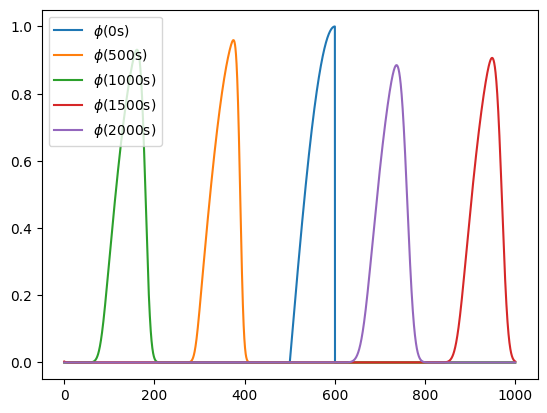

In [3]:
# Forward in time and foward in space
# unstable because velocity is greater than 0
u = -0.42
dx = 0.25
dt = 0.15

evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftfs()
evolution.showftfs()


If $\Delta t = \Delta x/u$ or $c = 1$, the FTBS scheme is stable and it does not show any damping or diffuson. The model exactly translates the initial shape in time. The weight in the formula:
$$\phi_j^{n+1} = (1-c)\phi_j^n + c\phi_{j-1}^n$$
are $0$ and $1$, i.e. no interpolation is performed and no error is present.


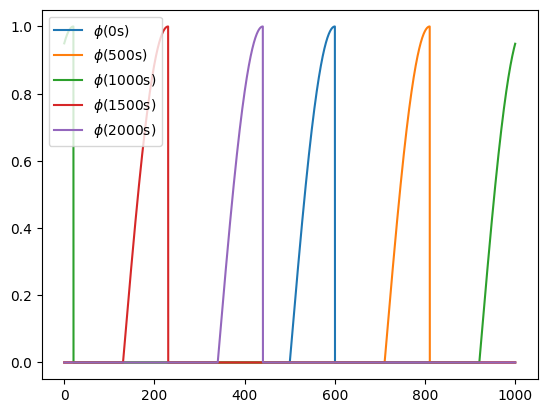

In [4]:
# Forward in time and backward in space
u = 0.42
dx = 0.25
dt = 0.15
dt = dx/u
evolution = differentialSolve(u, dt, dx, x, y)
evolution.ftbs()
evolution.showftbs()